#UNET

In [ ]:
import tensorflow as tf

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:
inputs = tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))

In [ ]:
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

Contraction part
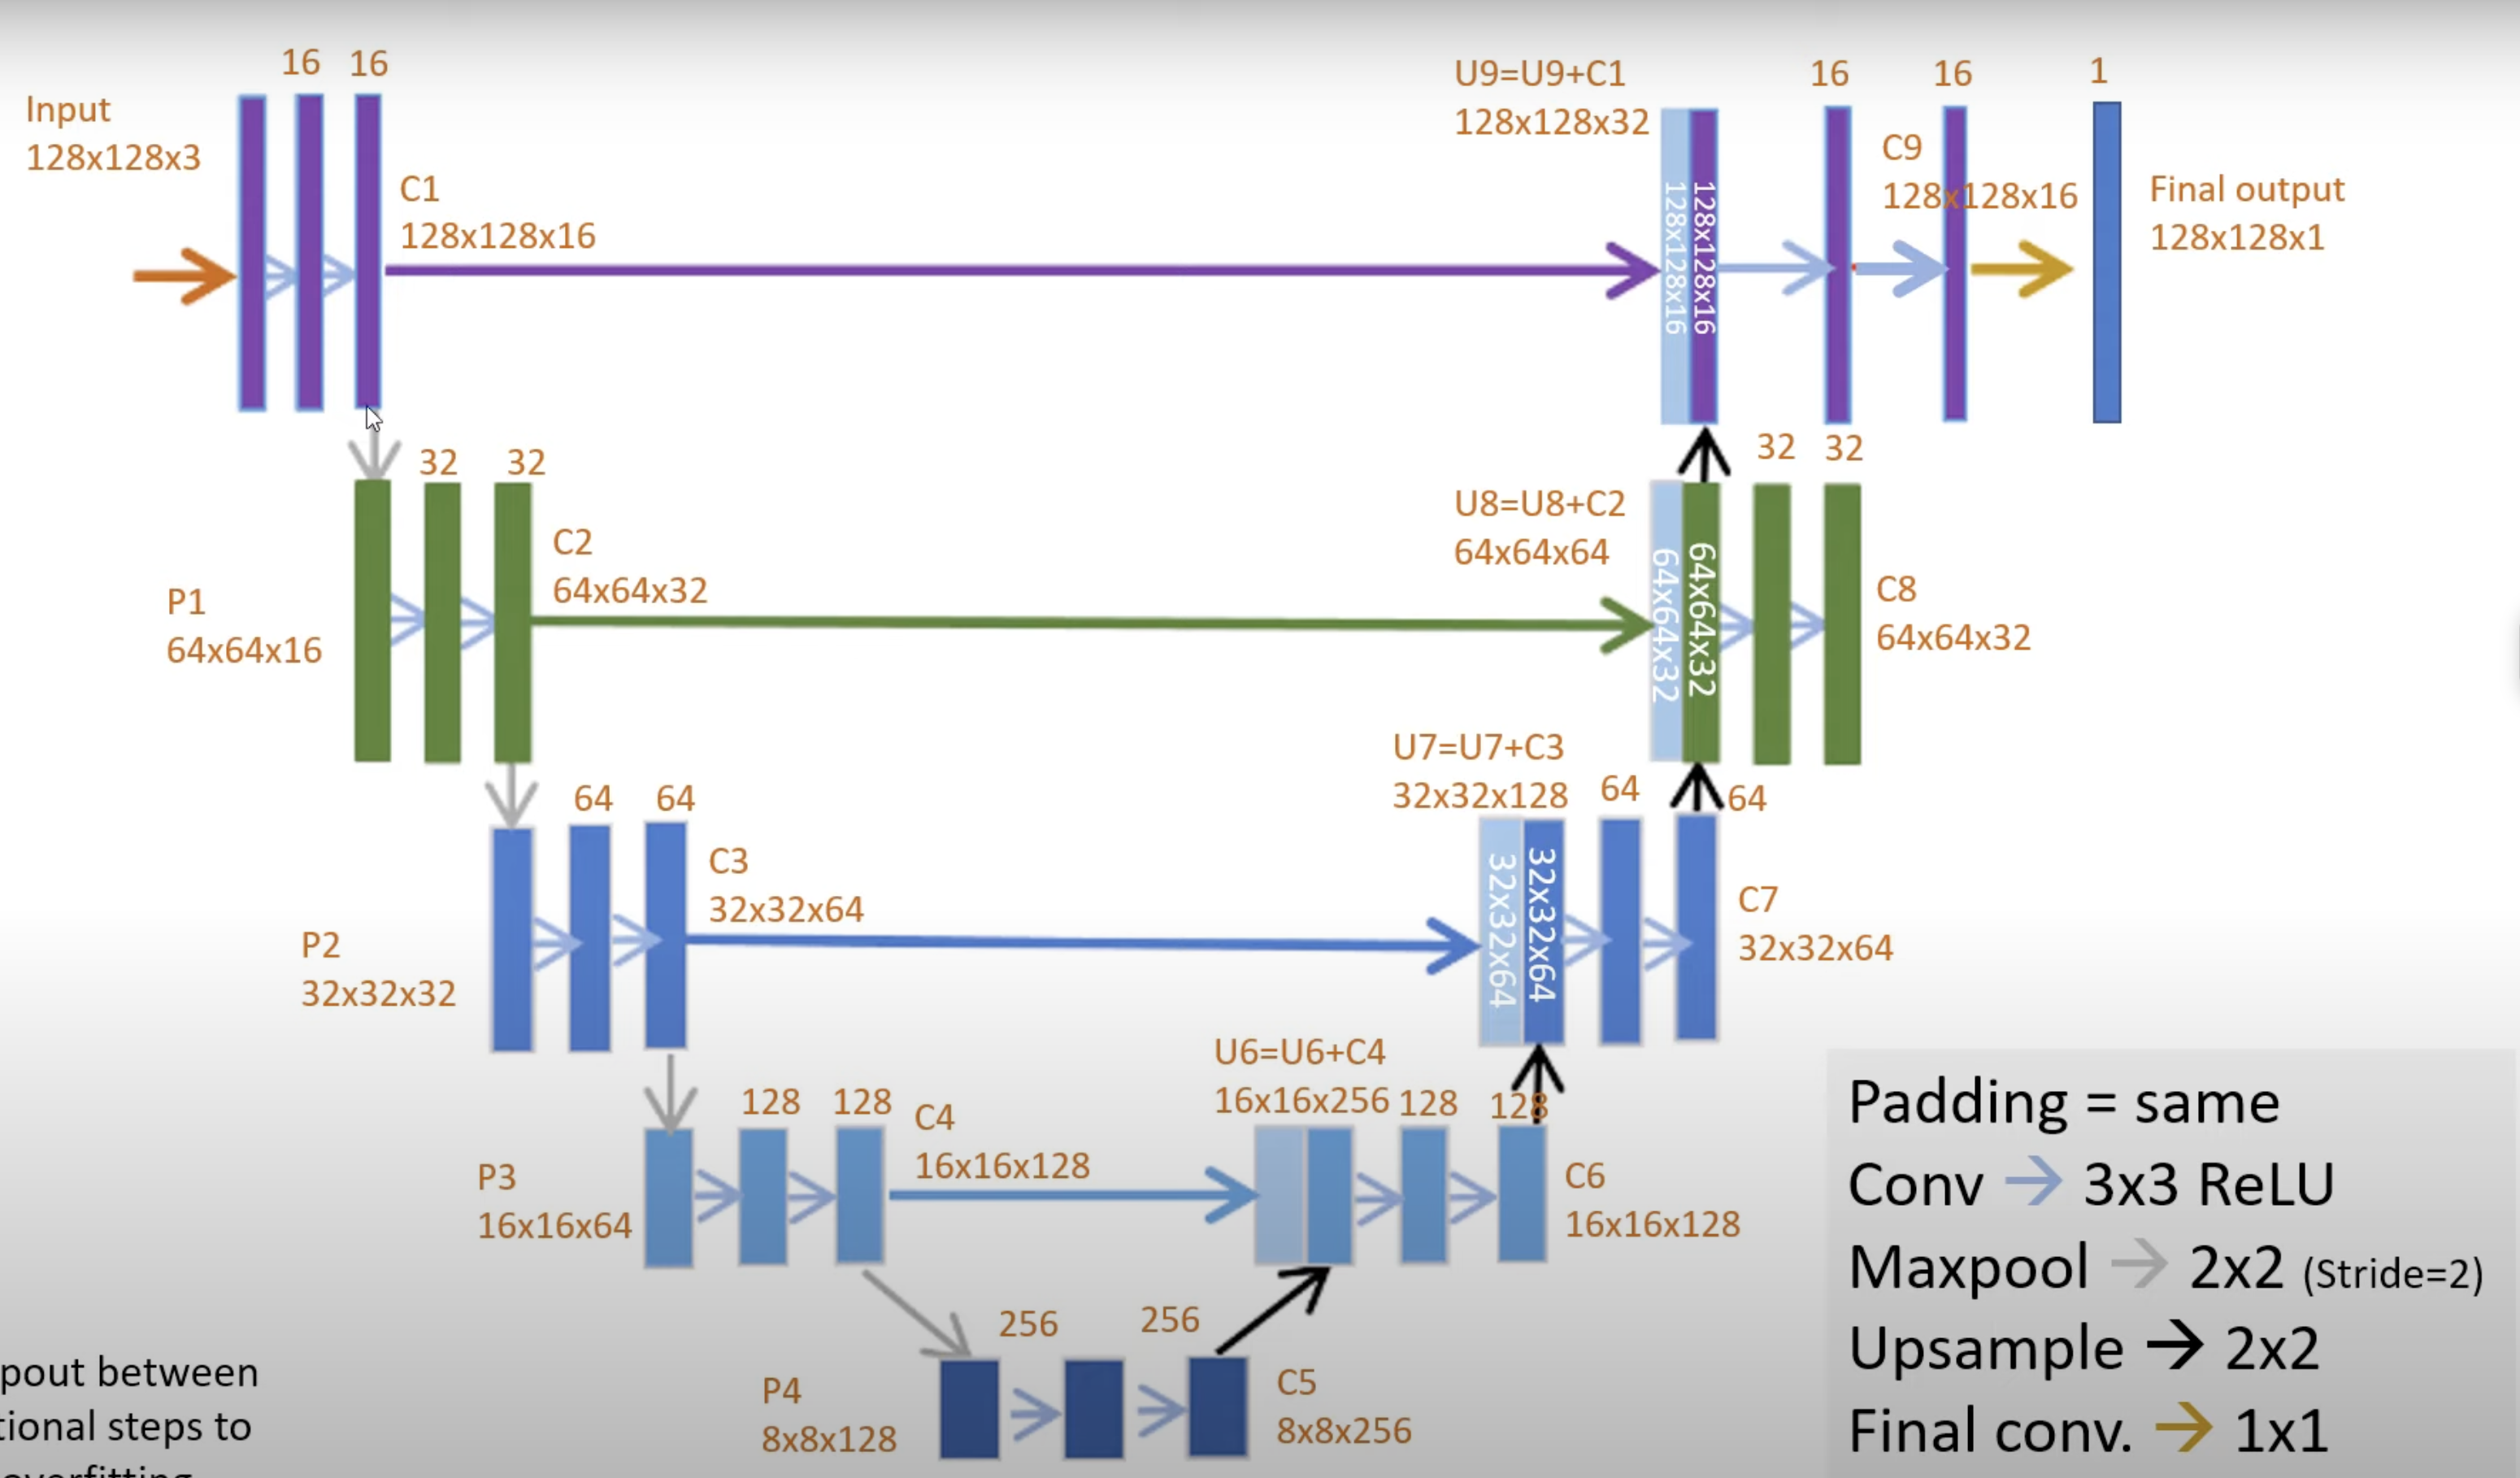


In [ ]:
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)


In [ ]:
c1 = tf.keras.layers.Dropout(0.1)(c1)

In [ ]:
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)

In [ ]:
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

In [ ]:
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

In [ ]:
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

In [ ]:
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

In [ ]:
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

Expansion part

In [ ]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.1)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)


In [ ]:
u7 = tf.keras.layers.Conv2DTranspose(64,(2,2), strides=(2,2), padding = 'same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.1)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [ ]:
u8 = tf.keras.layers.Conv2DTranspose(32,(2,2), strides=(2,2), padding = 'same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [ ]:
u9 = tf.keras.layers.Conv2DTranspose(16,(2,2), strides=(2,2), padding = 'same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

Outputs


In [ ]:
outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

In [ ]:
model = tf.keras.Model(inputs=[inputs], outputs = [outputs])
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 128, 128, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 128, 128, 16)   │            448 │ lambda_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 128, 128, 16)   │              0 │ conv2d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 128, 128, 16)   │          2,320 │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 64, 64, 16)     │              0 │ conv2d_29[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 64, 64, 32)     │          4,640 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 64, 64, 32)     │              0 │ conv2d_30[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 32, 32, 32)     │              0 │ conv2d_31[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 32, 32, 64)     │         18,496 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 32, 32, 64)     │              0 │ conv2d_32[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ dropout_15[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 16, 16, 64)     │              0 │ conv2d_33[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 16, 16, 128)    │         73,856 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 16, 16, 128)    │              0 │ conv2d_34[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 16, 16, 128)    │        147,584 │ dropout_16[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10     

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

Model checkpoint

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.keras', verbose=1, save_best_only = True)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

In [ ]:
import os
import numpy as np

In [ ]:
TRAIN_PATH = 'Fire/image'

In [ ]:
TEST_PATH =

In [ ]:
train_ids = os.walk(TRAIN_PATH)[1]

TypeError: 'generator' object is not subscriptable

In [ ]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype = np.uint8)

In [ ]:
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype = np.bool)

In [ ]:
for n, id_ in tqdm(enumerate(train_ids), total = len(train_ids)):
  path = 'Fire'
  img = imread(path + '/images' + id_ + '.png')[:, :, :IMG_CHANNELS]
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
  X_train[n] = img
  mask = np.zeros ((IMG_HEIGHT, IMG_WIDTH, 1),  dtype = np.bool)
  Y_train[n] = mask

CHAT GPT


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from skimage.io import imread
from skimage.transform import resize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_dir = '/content/drive/MyDrive/Fire_Dataset/image'
label_dir = '/content/drive/MyDrive/Fire_Dataset/label'

In [ ]:
# Lấy danh sách tên file từ thư mục ảnh và mask
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.png')])

In [ ]:

# Bước 2: Chia tập train và test
train_ids, test_ids = train_test_split(image_files, test_size=0.1, random_state=42)

In [ ]:
# Bước 3: Tạo X_train, Y_train
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)


In [ ]:
from skimage.color import rgb2gray

# Bước 4: Load dữ liệu vào X_train và Y_train
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    # Đọc ảnh
    img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img

    # Đọc mask
    mask_file = id_.replace('.jpg', '_label.png')
    mask = imread(os.path.join(label_dir, mask_file))

    # Nếu mask có 3 kênh màu, chuyển nó sang grayscale
    if len(mask.shape) == 3:
        mask = rgb2gray(mask)

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Thêm một chiều cho mask
    Y_train[n] = mask


100%|██████████| 396/396 [05:16<00:00,  1.25it/s]


In [ ]:
# # Tạo X_test (không cần Y_test vì không cần mask)
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

# # Load dữ liệu vào X_test
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_test[n] = img
# Tạo X_test, Y_test
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)  # Thay np.bool bằng bool

# Load dữ liệu vào X_test và Y_test
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

    # Đọc mask
    mask_file = id_.replace('.jpg', '_label.png')
    mask = imread(os.path.join(label_dir, mask_file))

    # Nếu mask có 3 kênh màu, chuyển nó sang grayscale
    if len(mask.shape) == 3:
        mask = rgb2gray(mask)

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Thêm chiều cho mask
    Y_test[n] = mask



100%|██████████| 44/44 [00:22<00:00,  1.99it/s]


In [ ]:
import matplotlib.pyplot as plt
import random
from skimage.io import imshow

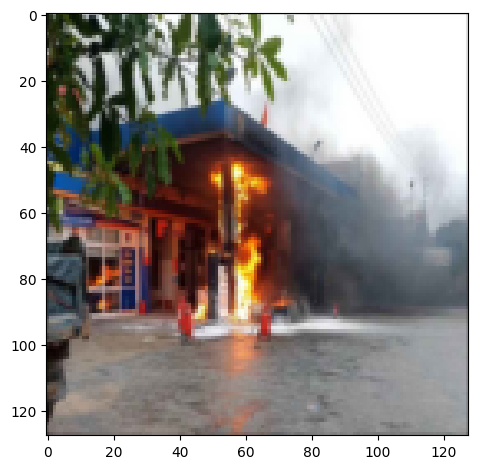

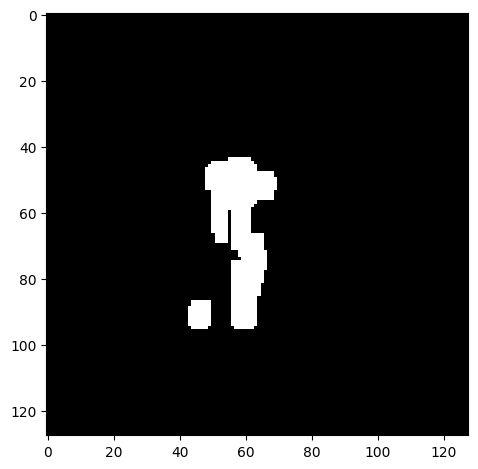

In [ ]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [ ]:
results = model.fit(X_train, Y_train,
                    validation_split=0.1,
                    batch_size=16,
                    epochs=25,
                    callbacks=callbacks)


Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8748 - loss: 0.4669 - val_accuracy: 0.8950 - val_loss: 0.4112
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9162 - loss: 0.3298 - val_accuracy: 0.8950 - val_loss: 0.2989
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9109 - loss: 0.2602 - val_accuracy: 0.8950 - val_loss: 0.2465
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9113 - loss: 0.2041 - val_accuracy: 0.8950 - val_loss: 0.2117
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9030 - loss: 0.2085 - val_accuracy: 0.8952 - val_loss: 0.2078
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9085 - loss: 0.1968 - val_accuracy: 0.9259 - val_loss: 0.1801
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9313 - loss: 0.1642 - val_accuracy: 0.9133 - val_loss: 0.2229
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.9349 - loss: 0.1590 - val_accuracy: 0.9278 - val_loss:

In [ ]:
import numpy as np

def iou(y_true, y_pred, num_classes):
    iou_per_class = []
    for i in range(num_classes):
        intersection = np.sum((y_true == i) & (y_pred == i))
        union = np.sum((y_true == i) | (y_pred == i))
        iou_per_class.append(intersection / (union + 1e-6))  # Tránh chia cho 0
    return np.mean(iou_per_class)

def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + 1e-6) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)

# Dự đoán nhãn cho tập kiểm tra
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(np.uint8)  # Chuyển đổi thành nhãn nhị phân

# Tính toán IoU và Dice Coefficient
iou_score = iou(Y_test.flatten(), Y_pred.flatten(), num_classes=2)  # Sửa num_classes nếu có nhiều lớp
dice_score = dice_coefficient(Y_test.flatten(), Y_pred.flatten())

# In kết quả
print(f'Mean IoU: {iou_score:.4f}')
print(f'Dice Coefficient: {dice_score:.4f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step
Mean IoU: 0.5917
Dice Coefficient: 0.4208


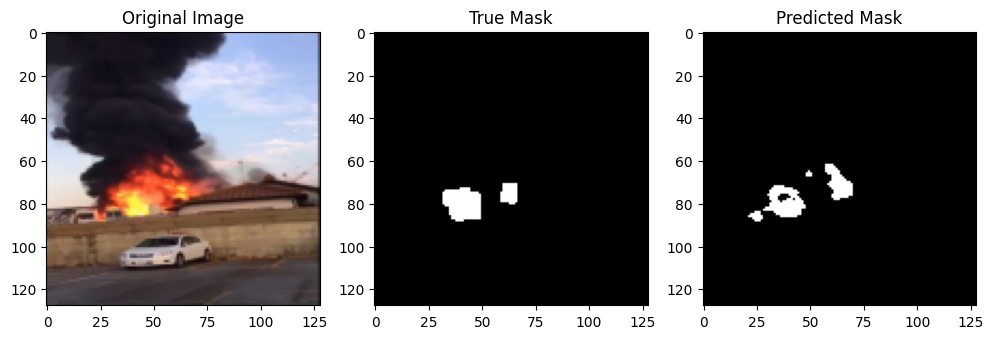

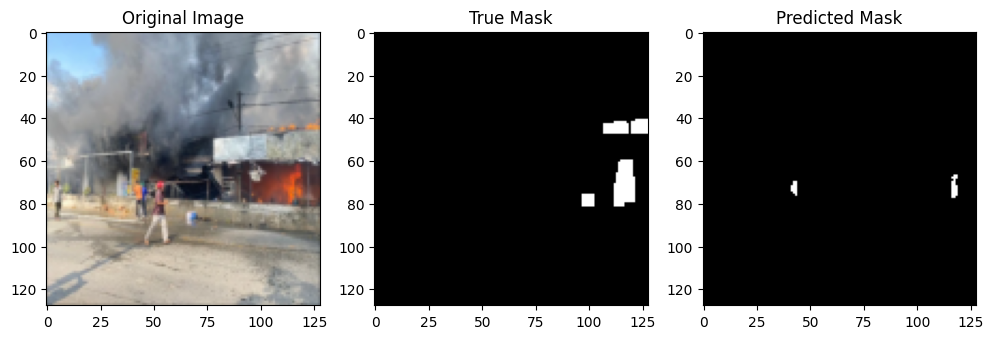

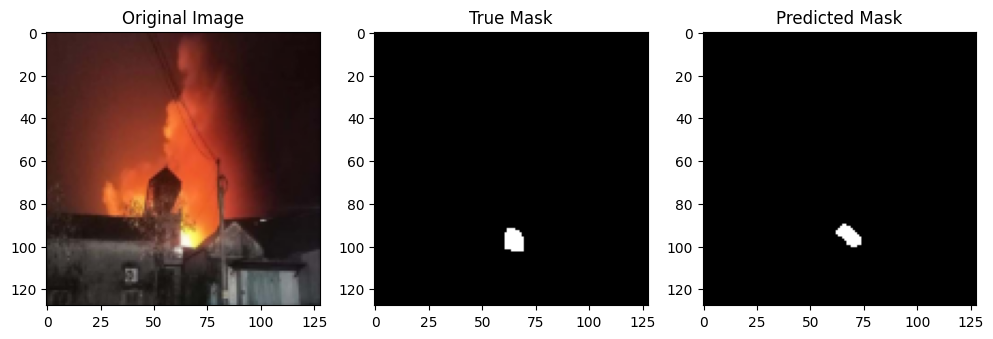

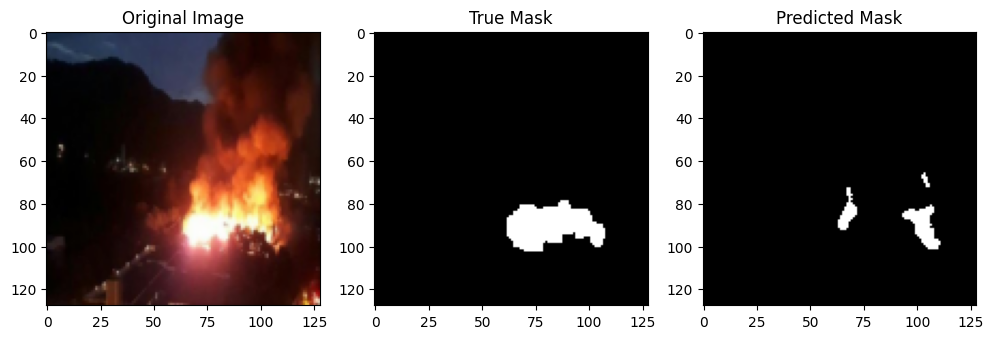

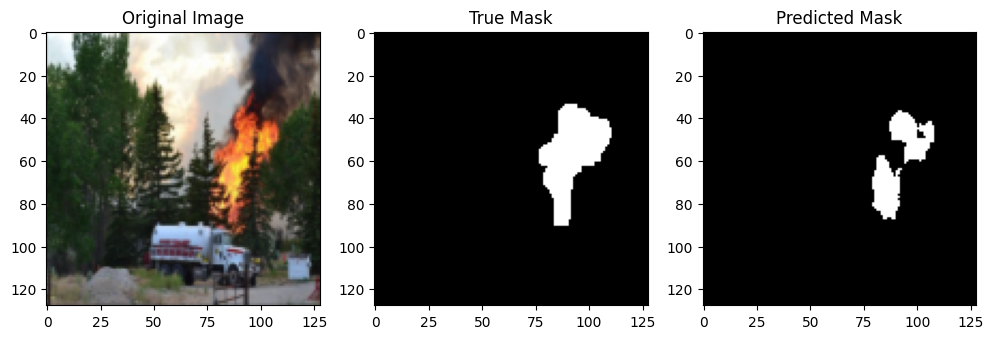

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị một số ảnh và mask
num_images = 5  # Số lượng ảnh muốn hiển thị
for i in range(num_images):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(X_test[i])

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(Y_test[i].squeeze(), cmap='gray')  # Squeeze để loại bỏ chiều không cần thiết

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(Y_pred[i].squeeze(), cmap='gray')

    plt.show()


#UNet(updated)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

Unet-Architecture
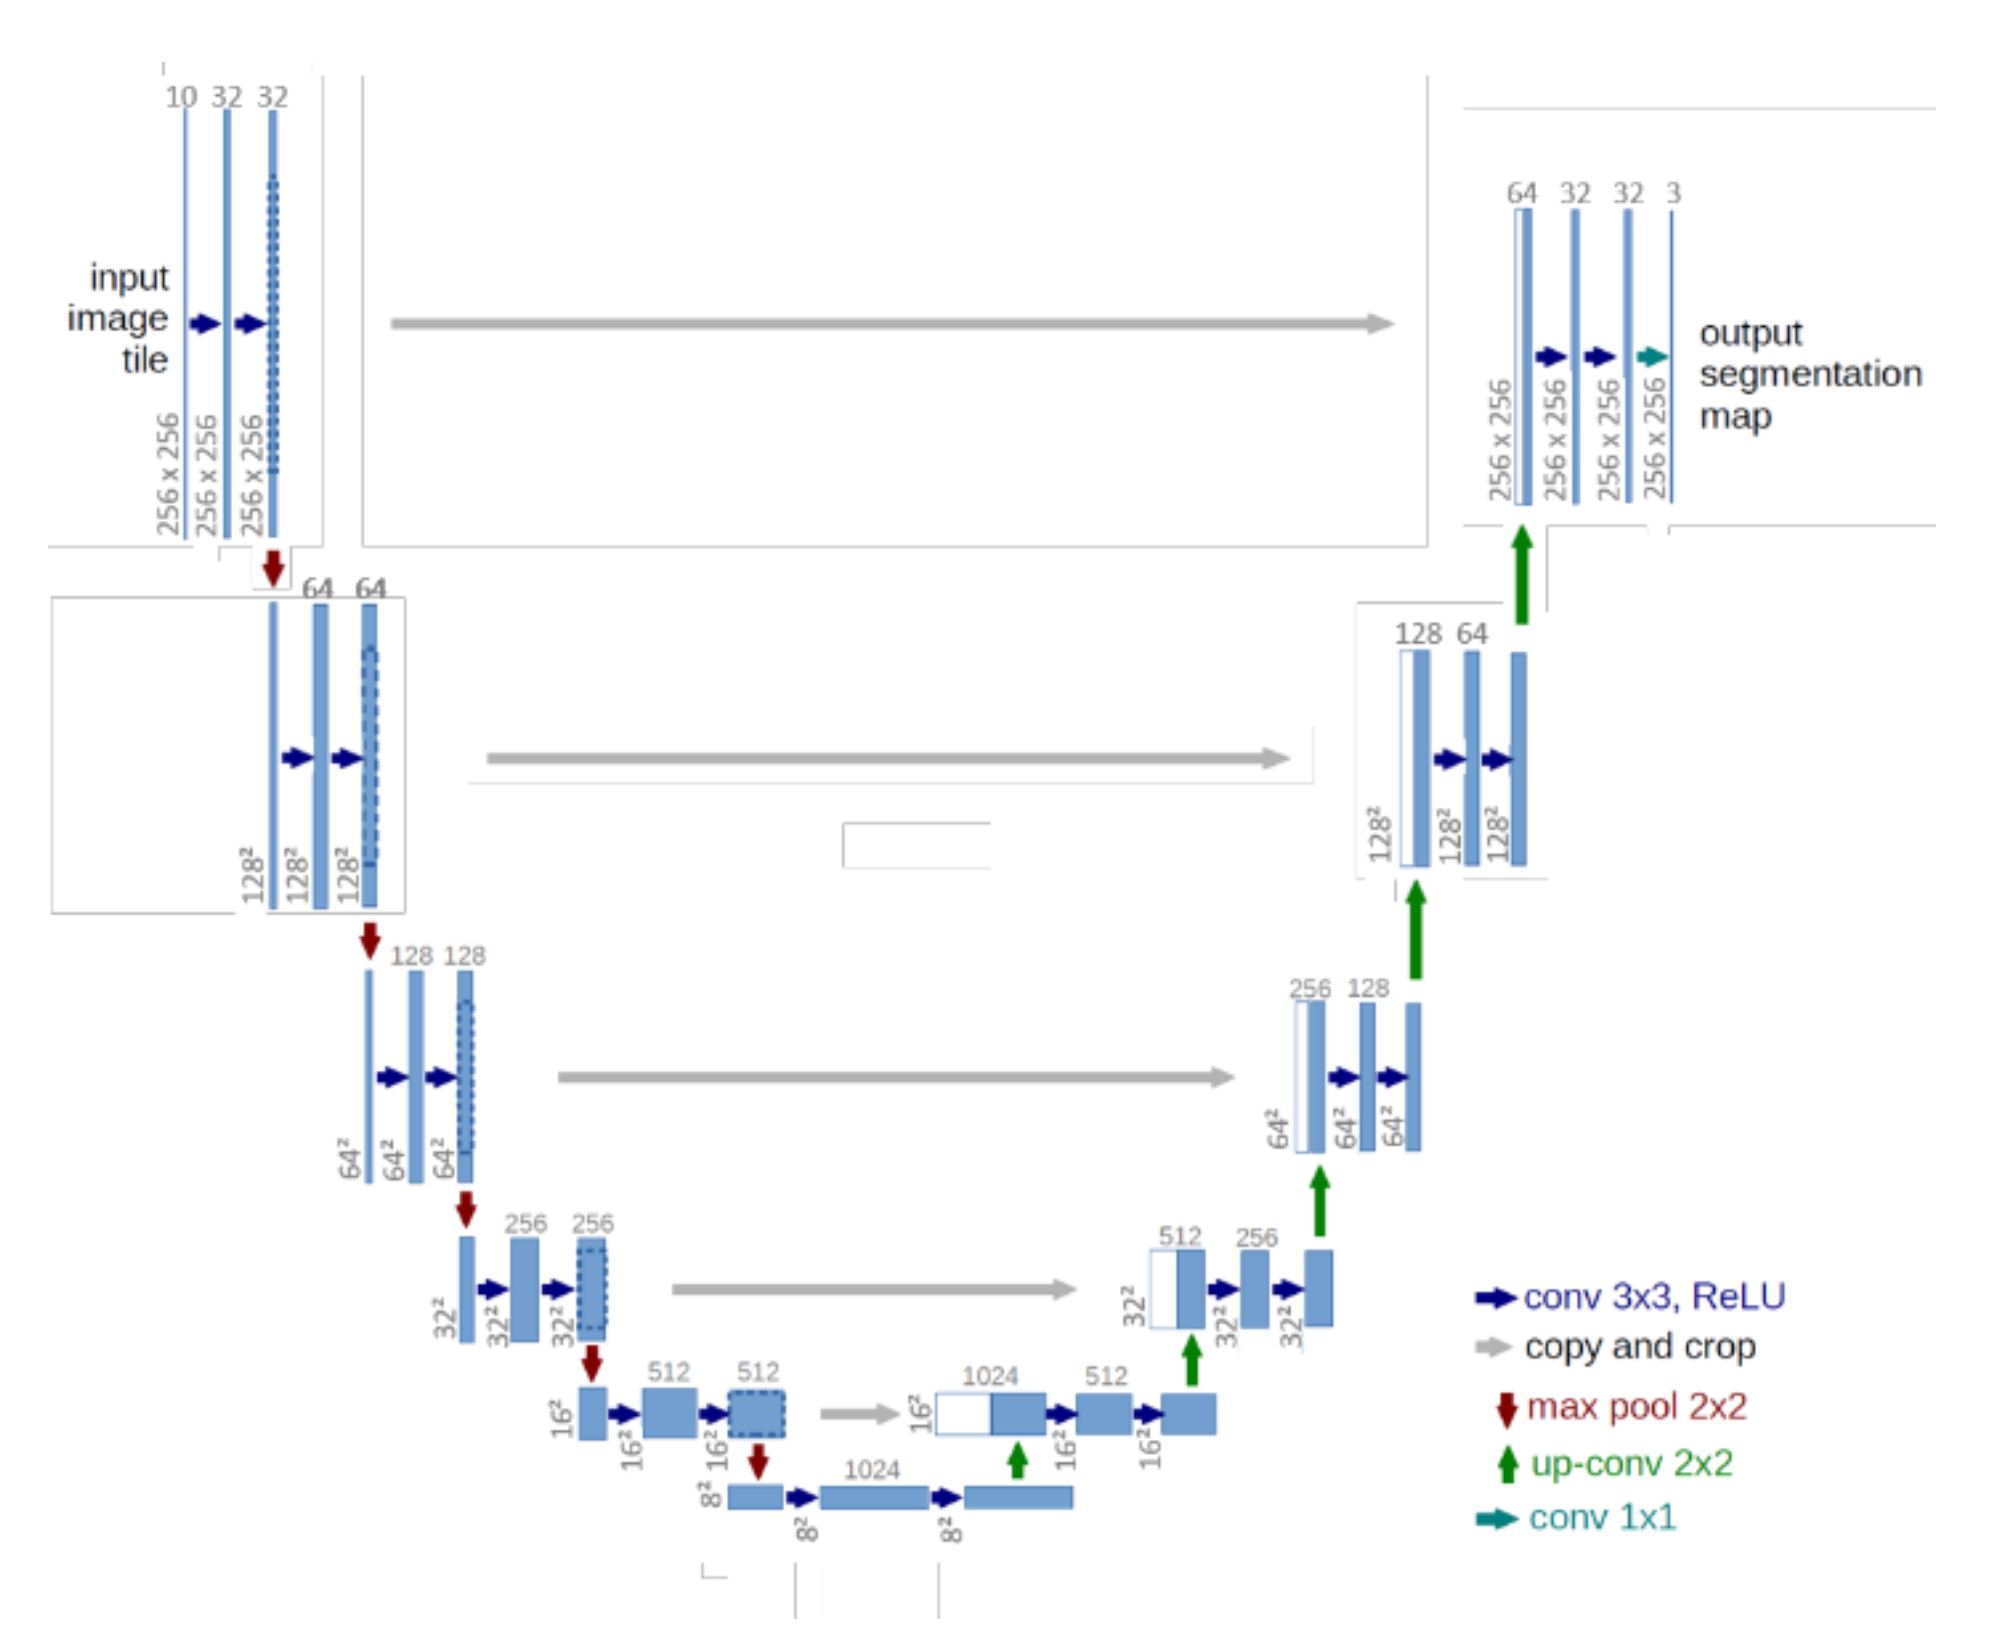

Mô hình

In [ ]:
def unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Contracting path
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Dropout(0.1)(c1)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Dropout(0.1)(c2)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Dropout(0.1)(c3)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Dropout(0.1)(c4)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Dropout(0.1)(c5)
    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c5)
    p5 = layers.MaxPooling2D((2, 2))(c5)

    c6 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p5)
    c6 = layers.Dropout(0.1)(c6)
    c6 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c6)

    # Expanding path
    u7 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c5])
    c7 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Dropout(0.1)(c7)
    c7 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c4])
    c8 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Dropout(0.1)(c8)
    c8 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c3])
    c9 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Dropout(0.1)(c9)
    c9 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c9)

    u10 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c9)
    u10 = layers.concatenate([u10, c2])
    c10 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u10)
    c10 = layers.Dropout(0.1)(c10)
    c10 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c10)

    u11 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c10)
    u11 = layers.concatenate([u11, c1])
    c11 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u11)
    c11 = layers.Dropout(0.1)(c11)
    c11 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c11)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c11)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

In [ ]:
# Define parameters
INITIAL_LEARNING_RATE = 0.001
MIN_LEARNING_RATE = 0.0001
BETA_1 = 0.9
BETA_2 = 0.999

In [ ]:
# Tạo mô hình U-Net
input_shape = (256, 256, 3)  # Kích thước của hình ảnh đầu vào
model = unet_model(input_shape)
adam_optimizer = Adam(learning_rate=INITIAL_LEARNING_RATE, beta_1=BETA_1, beta_2=BETA_2)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 32)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 32)   │          9,248 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 32)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 64)   │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 64)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 128)    │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 256)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 256)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 31,094,497 (118.62 MB)

 Trainable params: 31,094,497 (118.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Input, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tqdm import tqdm
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_dir = '/content/drive/MyDrive/Fire_Dataset/image'
label_dir = '/content/drive/MyDrive/Fire_Dataset/label'

In [ ]:
# Kích thước ảnh đầu vào
IMG_HEIGHT = 288
IMG_WIDTH = 288
IMG_CHANNELS = 3

In [ ]:
# Đường dẫn thư mục ảnh và mask
image_dir = '/content/drive/MyDrive/Fire_Dataset/image'
label_dir = '/content/drive/MyDrive/Fire_Dataset/label'

# Lấy danh sách file từ thư mục ảnh và mask
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.png')])

# Chia dữ liệu thành 60% train, 30% validation, 10% test
train_ids, temp_ids = train_test_split(image_files, test_size=0.4, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.25, random_state=42)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Fire_Dataset/label/image_238.png'

In [ ]:
from skimage.color import rgb2gray

Xử lý dữ liệu

In [ ]:
# Tạo X_train và Y_train
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)


# Bước 4: Load dữ liệu vào X_train và Y_train
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    # Đọc ảnh
    img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img

    # Đọc mask
    mask_file = id_.replace('.jpg', '_label.png')
    mask = imread(os.path.join(label_dir, mask_file))

    # Nếu mask có 3 kênh màu, chuyển nó sang grayscale
    if len(mask.shape) == 3:
        mask = rgb2gray(mask)

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Thêm một chiều cho mask
    Y_train[n] = mask



100%|██████████| 264/264 [00:41<00:00,  6.40it/s]


Check

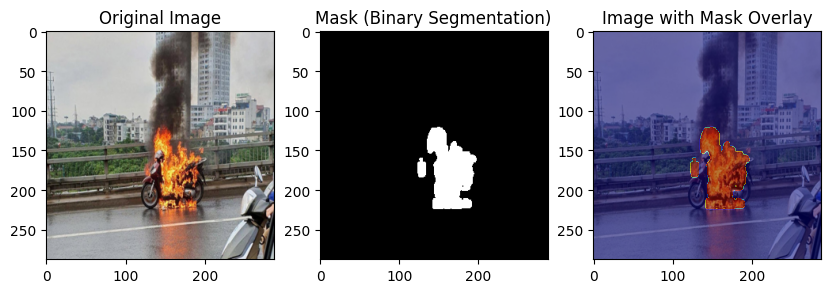

In [ ]:
import matplotlib.pyplot as plt

# Chọn một ảnh để kiểm tra
n = 5  # Thay đổi chỉ số này để kiểm tra các ảnh khác nếu cần

# Hiển thị ảnh gốc
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(X_train[n])  # Hiển thị ảnh gốc
plt.title('Original Image')

# Hiển thị mask nhị phân (được phân đoạn)
plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(Y_train[n]), cmap='gray')  # Hiển thị mask nhị phân (0 hoặc 1)
plt.title('Mask (Binary Segmentation)')

# Overlay mask lên ảnh gốc để kiểm tra sự tương ứng
plt.subplot(1, 3, 3)
plt.imshow(X_train[n])  # Hiển thị ảnh gốc
plt.imshow(np.squeeze(Y_train[n]), cmap='jet', alpha=0.5)  # Overlay mask với alpha (độ trong suốt)
plt.title('Image with Mask Overlay')

plt.show()


Val


In [ ]:
# Tạo X_val và Y_val
X_val = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_val = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)  # Thay np.bool bằng bool

# Load dữ liệu vào X_val và Y_val
for n, id_ in tqdm(enumerate(val_ids), total=len(val_ids)):
    # Đọc ảnh
    img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_val[n] = img

    # Đọc mask
    mask_file = id_.replace('.jpg', '_label.png')
    mask = imread(os.path.join(label_dir, mask_file))

    # Nếu mask có 3 kênh màu, chuyển sang grayscale
    if len(mask.shape) == 3:
        mask = rgb2gray(mask)

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Thêm chiều cho mask
    Y_val[n] = mask


100%|██████████| 132/132 [00:16<00:00,  7.86it/s]


In [ ]:
# Tạo X_test và Y_test
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)  # Thay np.bool bằng bool

# Load dữ liệu vào X_test và Y_test
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    # Đọc ảnh
    img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

    # Đọc mask
    mask_file = id_.replace('.jpg', '_label.png')
    mask = imread(os.path.join(label_dir, mask_file))

    # Nếu mask có 3 kênh màu, chuyển sang grayscale
    if len(mask.shape) == 3:
        mask = rgb2gray(mask)

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Thêm chiều cho mask
    Y_test[n] = mask


100%|██████████| 44/44 [00:35<00:00,  1.23it/s]


In [ ]:
# Kết quả X_train, Y_train, X_val, Y_val, X_test, Y_test đã sẵn sàng cho mô hình
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 264 samples
Validation set: 132 samples
Test set: 44 samples


Huấn luyện mô hình

In [ ]:
BATCH_SIZE = 30
DROPOUT_RATE = 0.1
MAX_EPOCHS = 500
EARLY_STOPPING_PATIENCE = 20


In [ ]:
# Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=MIN_LEARNING_RATE,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=EARLY_STOPPING_PATIENCE,
    restore_best_weights=True,
    verbose=1
)


In [ ]:
# Fit the model
results = model.fit(
              X_train, Y_train,
              validation_data=(X_val, Y_val),  # Use your validation data
              epochs=MAX_EPOCHS,
              batch_size=BATCH_SIZE,
              shuffle=True,  # Shuffle samples between epochs
              callbacks=[reduce_lr, early_stopping]
          )


Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node functional_13_1/patch_merging_154_1/Reshape defined at (most recent call last):
<stack traces unavailable>
Input to reshape is a tensor with 4515840 values, but the requested shape has 216760320

Stack trace for op definition: 
File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-136-c966395f7bd9>", line 2, in <cell line: 2>
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "<ipython-input-133-bc9026526ab8>", line 19, in call

	 [[{{node functional_13_1/patch_merging_154_1/Reshape}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_359750[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_iterator_360499]

In [ ]:
# # Save the model to a file
# model.save('/content/drive/MyDrive/IN/semantic_segmentation.h5')  # You can specify your desired filename

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/IN/semantic_segmentation.h5')

In [ ]:
import numpy as np
import time

def iou(y_true, y_pred, num_classes):
    iou_per_class = []
    for i in range(num_classes):
        intersection = np.sum((y_true == i) & (y_pred == i))
        union = np.sum((y_true == i) | (y_pred == i))
        iou_per_class.append(intersection / (union + 1e-6))  # Tránh chia cho 0
    return np.mean(iou_per_class)

def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + 1e-6) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)

# Tính thời gian trung bình khi dự đoán 1 tấm hình
num_images = X_test.shape[0]  # Tổng số ảnh trong tập kiểm tra
start_time = time.time()  # Bắt đầu đo thời gian

# Dự đoán nhãn cho tập kiểm tra
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(np.uint8)  # Chuyển đổi thành nhãn nhị phân

end_time = time.time()  # Kết thúc đo thời gian
total_time = end_time - start_time  # Tổng thời gian dự đoán tất cả các ảnh
average_time_per_image = total_time / num_images  # Thời gian trung bình cho một ảnh

# Tính toán IoU và Dice Coefficient
iou_score = iou(Y_test.flatten(), Y_pred.flatten(), num_classes=2)  # Sửa num_classes nếu có nhiều lớp
dice_score = dice_coefficient(Y_test.flatten(), Y_pred.flatten())

# In kết quả
print(f'Mean IoU: {iou_score:.4f}')
print(f'Dice Coefficient: {dice_score:.4f}')
print(f'Total number of images: {num_images}')
print(f'Average time per image: {average_time_per_image:.6f} seconds')


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step
Mean IoU: 0.6429
Dice Coefficient: 0.5233
Total number of images: 44
Average time per image: 0.234250 seconds


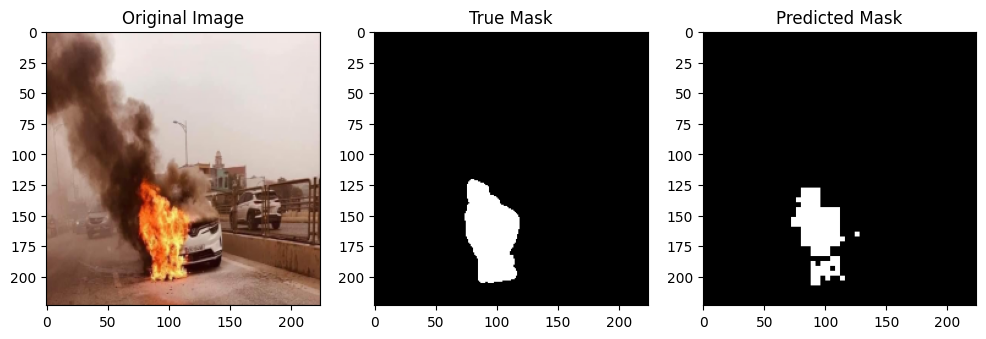

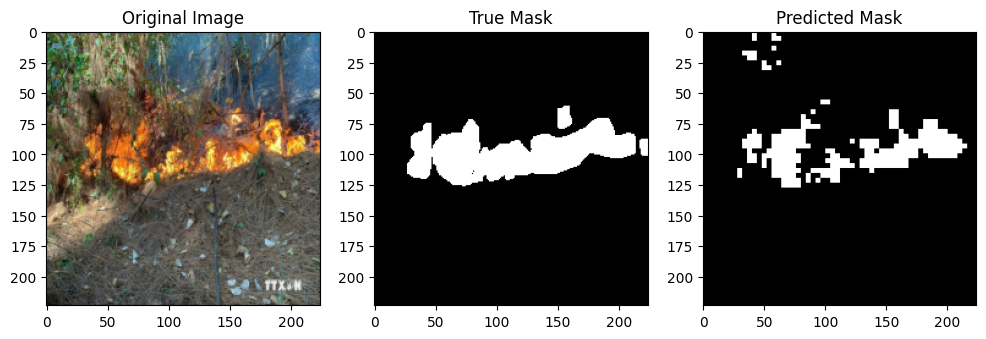

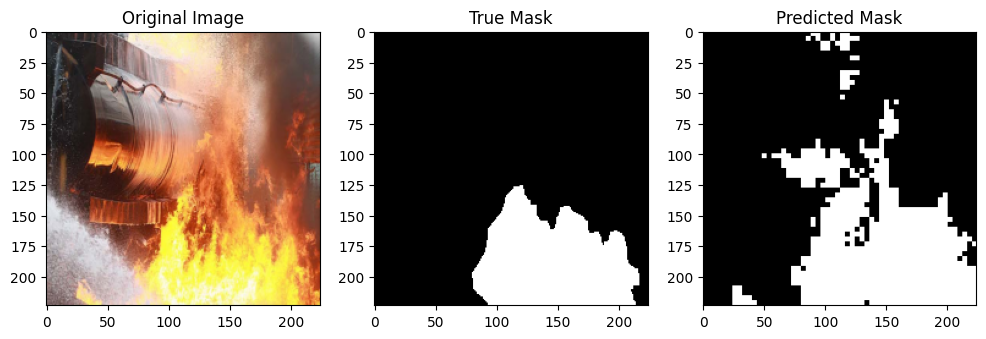

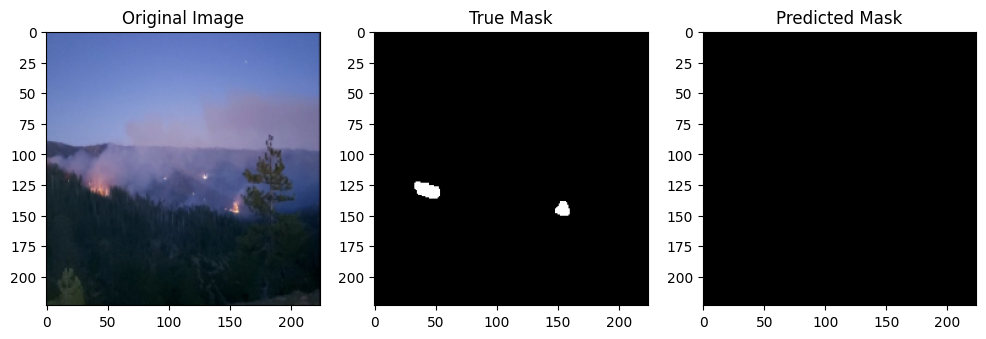

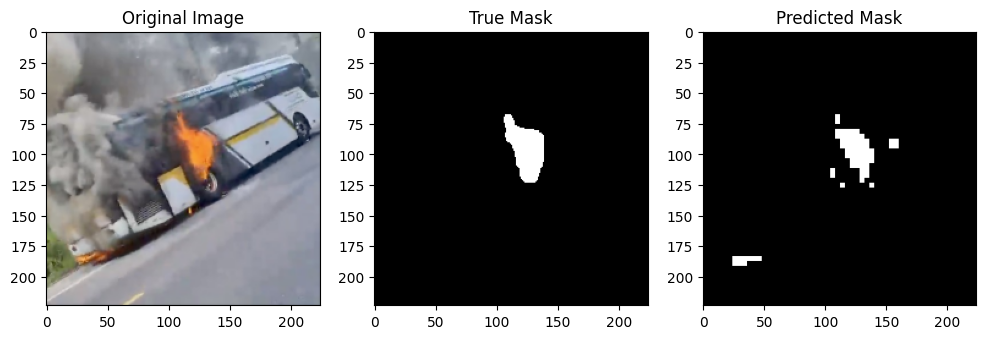

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị một số ảnh và mask
num_images = 5  # Số lượng ảnh muốn hiển thị
for i in range(num_images):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(X_test[i])

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(Y_test[i].squeeze(), cmap='gray')  # Squeeze để loại bỏ chiều không cần thiết

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(Y_pred[i].squeeze(), cmap='gray')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


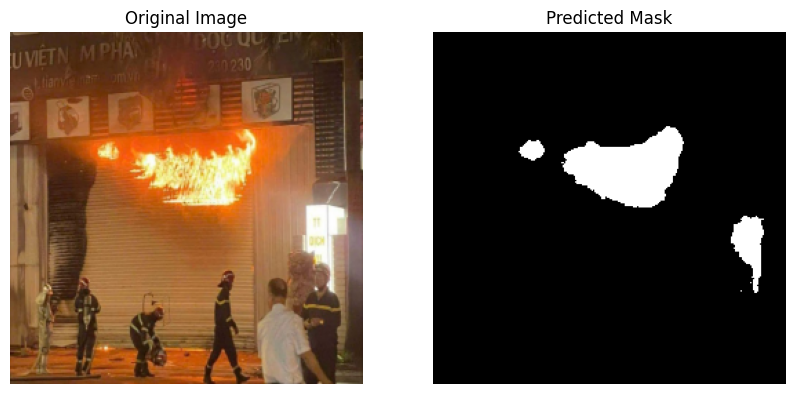

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# Các tham số cố định
IMG_HEIGHT = 256  # Chiều cao ảnh đầu vào
IMG_WIDTH = 256   # Chiều rộng ảnh đầu vào
IMG_CHANNELS = 3  # Số kênh màu (RGB)

# Đường dẫn đến ảnh bên ngoài
outside_image_path = './fire.png'  # Thay thế bằng đường dẫn thực tế của bạn

# Tạo mảng X_test cho một ảnh duy nhất
X_outside = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

# Đọc ảnh và điều chỉnh kích thước
img = imread(outside_image_path)[:, :, :IMG_CHANNELS]
img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

# Lưu ảnh vào X_outside và chuẩn hóa (nếu cần)
X_outside[0] = img

# Đưa ảnh vào mô hình để dự đoán
Y_pred_outside = model.predict(X_outside)

# Chuyển đổi dự đoán thành nhãn nhị phân (nếu là phân loại nhị phân)
Y_pred_outside = (Y_pred_outside > 0.5).astype(np.uint8)

# Hiển thị kết quả
plt.figure(figsize=(10, 5))

# Hình ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(X_outside[0])
plt.title('Original Image')
plt.axis('off')

# Kết quả dự đoán (mask)
plt.subplot(1, 2, 2)
plt.imshow(Y_pred_outside[0].squeeze(), cmap='gray')  # Squeeze để bỏ chiều không cần thiết
plt.title('Predicted Mask')
plt.axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


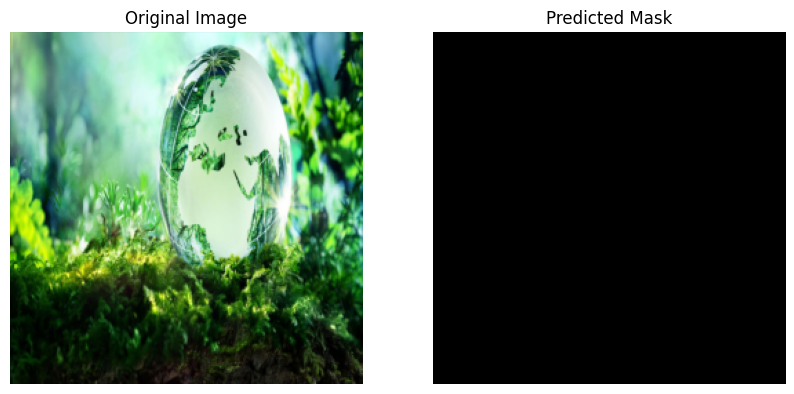

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# Các tham số cố định
IMG_HEIGHT = 256  # Chiều cao ảnh đầu vào
IMG_WIDTH = 256   # Chiều rộng ảnh đầu vào
IMG_CHANNELS = 3  # Số kênh màu (RGB)

# Đường dẫn đến ảnh bên ngoài
outside_image_path = '/content/thien-nhien-la-gi-1.jpg'  # Thay thế bằng đường dẫn thực tế của bạn

# Tạo mảng X_test cho một ảnh duy nhất
X_outside = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

# Đọc ảnh và điều chỉnh kích thước
img = imread(outside_image_path)[:, :, :IMG_CHANNELS]
img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

# Lưu ảnh vào X_outside và chuẩn hóa (nếu cần)
X_outside[0] = img

# Đưa ảnh vào mô hình để dự đoán
Y_pred_outside = model.predict(X_outside)

# Chuyển đổi dự đoán thành nhãn nhị phân (nếu là phân loại nhị phân)
Y_pred_outside = (Y_pred_outside > 0.5).astype(np.uint8)

# Hiển thị kết quả
plt.figure(figsize=(10, 5))

# Hình ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(X_outside[0])
plt.title('Original Image')
plt.axis('off')

# Kết quả dự đoán (mask)
plt.subplot(1, 2, 2)
plt.imshow(Y_pred_outside[0].squeeze(), cmap='gray')  # Squeeze để bỏ chiều không cần thiết
plt.title('Predicted Mask')
plt.axis('off')

plt.show()


Dự đoán của mô hình (giá trị pixel):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


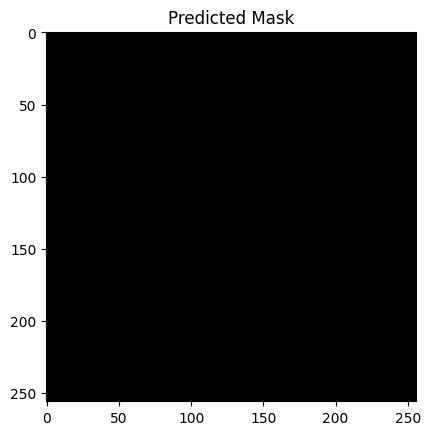

In [ ]:
# In giá trị dự đoán để kiểm tra
print("Dự đoán của mô hình (giá trị pixel):")
print(Y_pred_outside[0].squeeze())

# Hiển thị mask dự đoán
plt.imshow(Y_pred_outside[0].squeeze(), cmap='gray')
plt.title('Predicted Mask')
plt.show()


In [ ]:
print(np.unique(Y_pred))  # Kiểm tra các giá trị duy nhất trong Y_pred


[0]


##Đánh giá mô hình (chưa Done)

In [ ]:
# Predict on the test set
Y_pred_probs = model.predict(X_test)  # Get probabilities
Y_pred = (Y_pred_probs > 0.5).astype(np.uint8)  # Convert to binary masks based on a 50% threshold


2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 720ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Flatten the predictions and true labels for confusion matrix calculation
Y_test_flat = Y_test.flatten()
Y_pred_flat = Y_pred.flatten()

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test_flat, Y_pred_flat)

# Extracting TP, FP, FN, TN
TN, FP, FN, TP = conf_matrix.ravel()

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print TP, FP, FN, TN
print(f"True Positives: {TP}, False Positives: {FP}, False Negatives: {FN}, True Negatives: {TN}")


Confusion Matrix:
[[ 576826 2103898]
 [  25890  176970]]
True Positives: 176970, False Positives: 2103898, False Negatives: 25890, True Negatives: 576826


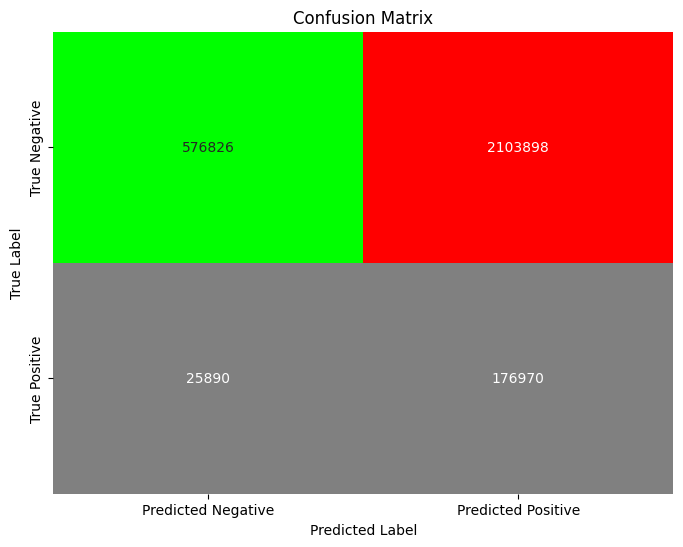

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the confusion matrix has already been calculated as 'conf_matrix'
# Extracting TP, FP, FN, TN for clarity
TN, FP, FN, TP = conf_matrix.ravel()

# Create a custom confusion matrix for visualization
matrix_to_plot = np.array([[TN, FP],
                            [FN, TP]])

# Create a color map: define specific colors for the four states
colors = np.array([[0.5, 0.5, 0.5],  # Gray for TN
                   [0, 1, 0],      # Green for FP
                   [1, 1, 0],      # Yellow for FN
                   [1, 0, 0]])     # Red for TP

# Create a custom colormap
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(colors)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_to_plot, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Calculate Precision, Recall, and F1-Score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


Precision: 0.0776
Recall: 0.8724
F1-Score: 0.1425


In [ ]:
# Define callbacks (early stopping and learning rate reduction)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)

# Training the model
model.fit(X_train, Y_train,
          batch_size=30,
          epochs=100,
          validation_data=(X_val, Y_val),
          callbacks=[early_stopping, reduce_lr],
          shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

#Swim-unet


In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Input, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tqdm import tqdm
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Kích thước ảnh đầu vào
IMG_HEIGHT = 288
IMG_WIDTH = 288
IMG_CHANNELS = 3

In [4]:
from sklearn.model_selection import train_test_split

# Đường dẫn thư mục ảnh và mask
image_dir = '/content/drive/MyDrive/Fire_Dataset/image'
label_dir = '/content/drive/MyDrive/Fire_Dataset/label'

# Lấy danh sách file từ thư mục ảnh và mask
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.png')])

# Bước 1: Chia dữ liệu ban đầu thành 60% train, 30% validation, và 10% test
train_ids, temp_ids = train_test_split(image_files, test_size=0.4, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.25, random_state=42)  # 0.25 x 40% = 10%

# Tính số lượng cần chuyển từ validation sang train để đạt 80% train và 10% validation
num_samples = len(image_files)
target_train_size = int(num_samples * 0.8)
samples_to_move = target_train_size - len(train_ids)

# Chuyển `samples_to_move` từ validation sang train
val_ids, val_to_train_ids = train_test_split(val_ids, test_size=samples_to_move, random_state=42)

# Kết hợp các mẫu chuyển vào train
train_ids.extend(val_to_train_ids)

# Kiểm tra tỷ lệ cuối cùng
print(f"Số lượng mẫu trong tập train: {len(train_ids)} (80%)")
print(f"Số lượng mẫu trong tập validation: {len(val_ids)} (10%)")
print(f"Số lượng mẫu trong tập test: {len(test_ids)} (10%)")


Số lượng mẫu trong tập train: 352 (80%)
Số lượng mẫu trong tập validation: 44 (10%)
Số lượng mẫu trong tập test: 44 (10%)


##Xử lý dữ liệu


In [5]:
# Tạo X_train và Y_train
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)


# Bước 4: Load dữ liệu vào X_train và Y_train
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    # Đọc ảnh
    img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img

    # Đọc mask
    mask_file = id_.replace('.jpg', '_label.png')
    mask = imread(os.path.join(label_dir, mask_file))

    # Nếu mask có 3 kênh màu, chuyển nó sang grayscale
    if len(mask.shape) == 3:
        mask = rgb2gray(mask)

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Thêm một chiều cho mask
    Y_train[n] = mask


100%|██████████| 352/352 [03:17<00:00,  1.78it/s]


In [6]:
# Tạo X_val và Y_val
X_val = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_val = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)  # Thay np.bool bằng bool

# Load dữ liệu vào X_val và Y_val
for n, id_ in tqdm(enumerate(val_ids), total=len(val_ids)):
    # Đọc ảnh
    img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_val[n] = img

    # Đọc mask
    mask_file = id_.replace('.jpg', '_label.png')
    mask = imread(os.path.join(label_dir, mask_file))

    # Nếu mask có 3 kênh màu, chuyển sang grayscale
    if len(mask.shape) == 3:
        mask = rgb2gray(mask)

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Thêm chiều cho mask
    Y_val[n] = mask

100%|██████████| 44/44 [00:20<00:00,  2.13it/s]


In [7]:
# Tạo X_test và Y_test
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)  # Thay np.bool bằng bool

# Load dữ liệu vào X_test và Y_test
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    # Đọc ảnh
    img = imread(os.path.join(image_dir, id_))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

    # Đọc mask
    mask_file = id_.replace('.jpg', '_label.png')
    mask = imread(os.path.join(label_dir, mask_file))

    # Nếu mask có 3 kênh màu, chuyển sang grayscale
    if len(mask.shape) == 3:
        mask = rgb2gray(mask)

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = np.expand_dims(mask, axis=-1)  # Thêm chiều cho mask
    Y_test[n] = mask


100%|██████████| 44/44 [00:19<00:00,  2.26it/s]


In [8]:
# Kết quả X_train, Y_train, X_val, Y_val, X_test, Y_test đã sẵn sàng cho mô hình
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 352 samples
Validation set: 44 samples
Test set: 44 samples


##Mô hình (Swin-Unet)



In [9]:
import tensorflow as tf
from tensorflow.keras import layers

In [13]:
import tensorflow as tf
from tensorflow.keras import layers

# Patch Partition: Chia ảnh thành các patch
class PatchPartition(layers.Layer):
    def __init__(self, patch_size):
        super(PatchPartition, self).__init__()
        self.patch_size = patch_size

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        height = tf.shape(inputs)[1]
        width = tf.shape(inputs)[2]
        channels = inputs.shape[-1]

        # Sử dụng tf.image.extract_patches để chia ảnh thành các patch kích thước patch_size x patch_size
        patches = tf.image.extract_patches(
            images=inputs,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )

        # Reshape lại thành định dạng (batch_size, height // patch_size, width // patch_size, patch_size * patch_size * channels)
        patches = tf.reshape(patches, (batch_size, height // self.patch_size, width // self.patch_size, self.patch_size * self.patch_size * channels))

        return patches

# Linear Embedding: Nhúng các patch vào không gian tuyến tính
class LinearEmbedding(layers.Layer):
    def __init__(self, embed_dim):
        super(LinearEmbedding, self).__init__()
        self.embed_dim = embed_dim
        self.proj = layers.Dense(embed_dim)  # Sử dụng Dense để giảm chiều về đúng kích thước

    def call(self, inputs):
        return self.proj(inputs)  # Chuyển inputs thông qua Dense để giảm số chiều

class SwinTransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, window_size, mlp_ratio=4, qkv_bias=True, dropout=0.):
        super(SwinTransformerBlock, self).__init__()
        self.embed_dim = embed_dim
        self.window_size = window_size
        self.mlp_ratio = mlp_ratio

        self.norm1 = layers.LayerNormalization()
        self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.norm2 = layers.LayerNormalization()

        # Đảm bảo rằng đầu ra của MLP phải cùng kích thước với đầu vào để cộng với `shortcut`
        self.mlp = tf.keras.Sequential([
            layers.Dense(embed_dim * mlp_ratio, activation='relu'),  # Lớp MLP ẩn
            layers.Dense(embed_dim)  # Đầu ra phải có kích thước giống với đầu vào
        ])

        # Conv2D để đảm bảo rằng số kênh của shortcut và mlp_output khớp nhau
        self.proj = layers.Conv2D(embed_dim, kernel_size=1)

    def call(self, x):
        shortcut = x  # Lưu đầu vào ban đầu để cộng với đầu ra (skip connection)
        x = self.norm1(x)
        x = self.attn(x, x)  # Self-attention
        x = x + shortcut  # Skip connection

        shortcut = x  # Cập nhật shortcut cho MLP
        x = self.norm2(x)
        mlp_output = self.mlp(x)

        # Điều chỉnh số lượng kênh của shortcut nếu cần thiết
        shortcut = self.proj(shortcut)
        x = mlp_output + shortcut  # Skip connection cho MLP

        return x

# Patch Merging: Giảm kích thước không gian
class PatchMerging(layers.Layer):
    def __init__(self, output_dim):
        super(PatchMerging, self).__init__()
        self.conv = layers.Conv2D(output_dim, kernel_size=2, strides=2)

    def call(self, x):
        return self.conv(x)

# Patch Expanding: Tăng kích thước không gian
class PatchExpanding(layers.Layer):
    def __init__(self, output_dim, scale_factor=2):
        super(PatchExpanding, self).__init__()
        self.conv = layers.Conv2D(output_dim, kernel_size=1)
        self.scale_factor = scale_factor

    def call(self, x):
        x = layers.UpSampling2D(size=(self.scale_factor, self.scale_factor))(x)
        return self.conv(x)

# Linear Projection: Chuyển đổi thành số kênh mong muốn
class LinearProjection(layers.Layer):
    def __init__(self, output_dim):
        super(LinearProjection, self).__init__()
        self.conv = layers.Conv2D(output_dim, kernel_size=1)

    def call(self, x):
        return self.conv(x)


In [14]:
# Xây dựng mô hình Swin U-Net với các giá trị C điều chỉnh
def swin_unet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Patch Partition và Linear Embedding
    x = PatchPartition(patch_size=4)(inputs)
    x = LinearEmbedding(embed_dim=3)(x)  # `C=3`

    # Encoder
    x1 = SwinTransformerBlock(embed_dim=3, num_heads=1, window_size=7)(x)
    x1 = SwinTransformerBlock(embed_dim=3, num_heads=1, window_size=7)(x1)

    x2 = PatchMerging(output_dim=6)(x1)  # `C=6`
    x2 = SwinTransformerBlock(embed_dim=6, num_heads=2, window_size=7)(x2)
    x2 = SwinTransformerBlock(embed_dim=6, num_heads=2, window_size=7)(x2)

    x3 = PatchMerging(output_dim=12)(x2)  # `C=12`
    x3 = SwinTransformerBlock(embed_dim=12, num_heads=4, window_size=7)(x3)
    x3 = SwinTransformerBlock(embed_dim=12, num_heads=4, window_size=7)(x3)

    x4 = PatchMerging(output_dim=24)(x3)  # `C=24`
    x4 = SwinTransformerBlock(embed_dim=24, num_heads=8, window_size=7)(x4)
    x4 = SwinTransformerBlock(embed_dim=24, num_heads=8, window_size=7)(x4)

    # Decoder
    x = PatchExpanding(output_dim=12)(x4)  # `C=12`
    x = layers.Concatenate()([x, x3])
    x = SwinTransformerBlock(embed_dim=12, num_heads=4, window_size=7)(x)
    x = SwinTransformerBlock(embed_dim=12, num_heads=4, window_size=7)(x)

    x = PatchExpanding(output_dim=6)(x)  # `C=6`
    x = layers.Concatenate()([x, x2])
    x = SwinTransformerBlock(embed_dim=6, num_heads=2, window_size=7)(x)
    x = SwinTransformerBlock(embed_dim=6, num_heads=2, window_size=7)(x)

    x = PatchExpanding(output_dim=3)(x)  # `C=3`
    x = layers.Concatenate()([x, x1])
    x = SwinTransformerBlock(embed_dim=3, num_heads=1, window_size=7)(x)
    x = SwinTransformerBlock(embed_dim=3, num_heads=1, window_size=7)(x)

    x = PatchExpanding(output_dim=3, scale_factor=4)(x)  # Trở về WxHx3

    outputs = layers.Conv2D(num_classes, kernel_size=(1, 1), activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

##Model(SwinV2-Unet)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Patch Partition: Chia ảnh thành các patch
class PatchPartition(layers.Layer):
    def __init__(self, patch_size):
        super(PatchPartition, self).__init__()
        self.patch_size = patch_size

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        height = tf.shape(inputs)[1]
        width = tf.shape(inputs)[2]
        channels = inputs.shape[-1]

        # Sử dụng tf.image.extract_patches để chia ảnh thành các patch kích thước patch_size x patch_size
        patches = tf.image.extract_patches(
            images=inputs,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )

        # Reshape lại thành định dạng (batch_size, height // patch_size, width // patch_size, patch_size * patch_size * channels)
        patches = tf.reshape(patches, (batch_size, height // self.patch_size, width // self.patch_size, self.patch_size * self.patch_size * channels))

        return patches

# Linear Embedding: Nhúng các patch vào không gian tuyến tính
class LinearEmbedding(layers.Layer):
    def __init__(self, embed_dim):
        super(LinearEmbedding, self).__init__()
        self.embed_dim = embed_dim
        self.proj = layers.Dense(embed_dim)  # Bỏ L2 Regularization

    def call(self, inputs):
        return self.proj(inputs)

class SwinTransformerBlockV2(layers.Layer):
    def __init__(self, embed_dim, num_heads, window_size, mlp_ratio=4, qkv_bias=True, dropout=0., shift_size=0, stochastic_depth=0.):
        super(SwinTransformerBlockV2, self).__init__()
        self.embed_dim = embed_dim
        self.window_size = window_size
        self.mlp_ratio = mlp_ratio
        self.shift_size = shift_size
        self.stochastic_depth = stochastic_depth

        self.norm1 = layers.LayerNormalization()
        self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.norm2 = layers.LayerNormalization()

        # MLP với Dropout
        self.mlp = tf.keras.Sequential([
            layers.Dense(embed_dim * mlp_ratio, activation='relu'),
            layers.Dropout(dropout),  # Thêm Dropout
            layers.Dense(embed_dim)
        ])

        # Conv2D
        self.proj = layers.Conv2D(embed_dim, kernel_size=1)

        # Thêm Stochastic Depth
        self.stoch_depth = layers.Dropout(stochastic_depth)

    def cyclic_shift(self, x, shift_size):
        # Thực hiện cyclic shift
        return tf.roll(x, shift=[-shift_size, -shift_size], axis=[1, 2])

    def call(self, x, training=None):
        shortcut = x

        # Shift windows nếu shift_size > 0
        if self.shift_size > 0:
            x = self.cyclic_shift(x, self.shift_size)

        # Self Attention và LayerNorm
        x = self.norm1(x)
        x = self.attn(x, x)

        # Skip connection
        x = self.stoch_depth(x, training=training) + shortcut

        # MLP và LayerNorm
        shortcut = x
        x = self.norm2(x)
        x = self.mlp(x)

        # Điều chỉnh số lượng kênh của shortcut nếu cần thiết
        shortcut = self.proj(shortcut)
        x = x + shortcut  # Skip connection cho MLP

        return x

# Patch Merging: Giảm kích thước không gian
class PatchMerging(layers.Layer):
    def __init__(self, output_dim):
        super(PatchMerging, self).__init__()
        self.conv = layers.Conv2D(output_dim, kernel_size=2, strides=2)  # Bỏ L2 Regularization

    def call(self, x):
        return self.conv(x)

# Patch Expanding: Tăng kích thước không gian
class PatchExpanding(layers.Layer):
    def __init__(self, output_dim, scale_factor=2):
        super(PatchExpanding, self).__init__()
        self.conv = layers.Conv2D(output_dim, kernel_size=1)  # Bỏ L2 Regularization
        self.scale_factor = scale_factor

    def call(self, x):
        x = layers.UpSampling2D(size=(self.scale_factor, self.scale_factor))(x)
        return self.conv(x)

# Linear Projection: Chuyển đổi thành số kênh mong muốn
class LinearProjection(layers.Layer):
    def __init__(self, output_dim):
        super(LinearProjection, self).__init__()
        self.conv = layers.Conv2D(output_dim, kernel_size=1)  # Bỏ L2 Regularization

    def call(self, x):
        return self.conv(x)


In [ ]:
# Xây dựng mô hình Swin U-Net v2 với các giá trị C điều chỉnh
def swin_unet_v2(input_shape, num_classes, dropout_rate=0.1, stochastic_depth=0.1):
    inputs = layers.Input(shape=input_shape)

    # Patch Partition và Linear Embedding
    x = PatchPartition(patch_size=4)(inputs)
    x = LinearEmbedding(embed_dim=3)(x)  # `C=3`

    # Encoder
    x1 = SwinTransformerBlockV2(embed_dim=3, num_heads=1, window_size=7, dropout=dropout_rate, shift_size=0, stochastic_depth=stochastic_depth)(x)
    x1 = SwinTransformerBlockV2(embed_dim=3, num_heads=1, window_size=7, dropout=dropout_rate, shift_size=0, stochastic_depth=stochastic_depth)(x1)

    x2 = PatchMerging(output_dim=6)(x1)  # `C=6`
    x2 = SwinTransformerBlockV2(embed_dim=6, num_heads=2, window_size=7, dropout=dropout_rate, shift_size=2, stochastic_depth=stochastic_depth)(x2)
    x2 = SwinTransformerBlockV2(embed_dim=6, num_heads=2, window_size=7, dropout=dropout_rate, shift_size=2, stochastic_depth=stochastic_depth)(x2)

    x3 = PatchMerging(output_dim=12)(x2)  # `C=12`
    x3 = SwinTransformerBlockV2(embed_dim=12, num_heads=4, window_size=7, dropout=dropout_rate, shift_size=3, stochastic_depth=stochastic_depth)(x3)
    x3 = SwinTransformerBlockV2(embed_dim=12, num_heads=4, window_size=7, dropout=dropout_rate, shift_size=3, stochastic_depth=stochastic_depth)(x3)

    x4 = PatchMerging(output_dim=24)(x3)  # `C=24`
    x4 = SwinTransformerBlockV2(embed_dim=24, num_heads=8, window_size=7, dropout=dropout_rate, shift_size=4, stochastic_depth=stochastic_depth)(x4)
    x4 = SwinTransformerBlockV2(embed_dim=24, num_heads=8, window_size=7, dropout=dropout_rate, shift_size=4, stochastic_depth=stochastic_depth)(x4)

    # Decoder
    x = PatchExpanding(output_dim=12)(x4)  # `C=12`
    x = layers.Concatenate()([x, x3])
    x = SwinTransformerBlockV2(embed_dim=12, num_heads=4, window_size=7, dropout=dropout_rate, shift_size=3, stochastic_depth=stochastic_depth)(x)
    x = SwinTransformerBlockV2(embed_dim=12, num_heads=4, window_size=7, dropout=dropout_rate, shift_size=3, stochastic_depth=stochastic_depth)(x)

    x = PatchExpanding(output_dim=6)(x)  # `C=6`
    x = layers.Concatenate()([x, x2])
    x = SwinTransformerBlockV2(embed_dim=6, num_heads=2, window_size=7, dropout=dropout_rate, shift_size=2, stochastic_depth=stochastic_depth)(x)
    x = SwinTransformerBlockV2(embed_dim=6, num_heads=2, window_size=7, dropout=dropout_rate, shift_size=2, stochastic_depth=stochastic_depth)(x)

    x = PatchExpanding(output_dim=3)(x)  # `C=3`
    x = layers.Concatenate()([x, x1])
    x = SwinTransformerBlockV2(embed_dim=3, num_heads=1, window_size=7, dropout=dropout_rate, shift_size=1, stochastic_depth=stochastic_depth)(x)
    x = SwinTransformerBlockV2(embed_dim=3, num_heads=1, window_size=7, dropout=dropout_rate, shift_size=1, stochastic_depth=stochastic_depth)(x)

    x = PatchExpanding(output_dim=3, scale_factor=4)(x)  # Trở về WxHx3

    # Linear Projection -> WxHx1
    outputs = layers.Conv2D(num_classes, kernel_size=(1, 1), activation='sigmoid')(x)

    # Trả về mô hình hoàn chỉnh
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


##Train model

In [12]:
model = swin_unet(input_shape=(288, 288, 3), num_classes=1)
model.summary()


NameError: name 'swin_unet' is not defined

In [ ]:
INITIAL_LEARNING_RATE = 0.001
adam_optimizer = Adam(learning_rate=INITIAL_LEARNING_RATE)

# Compile model với optimizer đã tuỳ chỉnh
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

###Setting configuration


In [ ]:
BATCH_SIZE = 16
DROPOUT_RATE = 0.1
MAX_EPOCHS = 100
EARLY_STOPPING_PATIENCE = 5

In [ ]:
# # Callbacks
# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=10,
#     min_lr=MIN_LEARNING_RATE,
#     verbose=1
# )

early_stopping = EarlyStopping(
    monitor='loss',
    patience=EARLY_STOPPING_PATIENCE,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
# Fit the model
results = model.fit(
              X_train, Y_train,
              validation_data=(X_val, Y_val),  # Use your validation data
              epochs=MAX_EPOCHS,
              batch_size=16,
              shuffle=True,  # Shuffle samples between epochs
              callbacks=[early_stopping]
          )


In [ ]:
# # Save the model to a file
# model.save('/content/drive/MyDrive/IN/swin_unetv2.h5')

NameError: name 'model' is not defined

##Test from test dataset

In [ ]:
import numpy as np
import time

def iou(y_true, y_pred, num_classes):
    iou_per_class = []
    for i in range(num_classes):
        intersection = np.sum((y_true == i) & (y_pred == i))
        union = np.sum((y_true == i) | (y_pred == i))
        iou_per_class.append(intersection / (union + 1e-6))  # Tránh chia cho 0
    return np.mean(iou_per_class)

def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + 1e-6) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)

# Tính thời gian trung bình khi dự đoán 1 tấm hình
num_images = X_test.shape[0]  # Tổng số ảnh trong tập kiểm tra
start_time = time.time()  # Bắt đầu đo thời gian

# Dự đoán nhãn cho tập kiểm tra
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(np.uint8)  # Chuyển đổi thành nhãn nhị phân

end_time = time.time()  # Kết thúc đo thời gian
total_time = end_time - start_time  # Tổng thời gian dự đoán tất cả các ảnh
average_time_per_image = total_time / num_images  # Thời gian trung bình cho một ảnh

# Tính toán IoU và Dice Coefficient
iou_score = iou(Y_test.flatten(), Y_pred.flatten(), num_classes=2)  # Sửa num_classes nếu có nhiều lớp
dice_score = dice_coefficient(Y_test.flatten(), Y_pred.flatten())

# In kết quả
print(f'Mean IoU: {iou_score:.4f}')
print(f'Dice Coefficient: {dice_score:.4f}')
print(f'Total number of images: {num_images}')
print(f'Average time per image: {average_time_per_image:.6f} seconds')


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step
Mean IoU: 0.7450
Dice Coefficient: 0.6938
Total number of images: 44
Average time per image: 0.233912 seconds


##Test according to number of image (we choose)

In [ ]:
import numpy as np
import time

def iou(y_true, y_pred, num_classes):
    iou_per_class = []
    for i in range(num_classes):
        intersection = np.sum((y_true == i) & (y_pred == i))
        union = np.sum((y_true == i) | (y_pred == i))
        iou_per_class.append(intersection / (union + 1e-6))  # Tránh chia cho 0
    return np.mean(iou_per_class)

def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + 1e-6) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)

# Lấy 10 hình từ tập kiểm tra
num_images_to_test = 20
X_test_subset = X_test[:num_images_to_test]  # Chọn 10 hình
Y_test_subset = Y_test[:num_images_to_test]  # Chọn 10 nhãn tương ứng

start_time = time.time()  # Bắt đầu đo thời gian

# Dự đoán nhãn cho tập con 10 hình
Y_pred_subset = model.predict(X_test_subset)
Y_pred_subset = (Y_pred_subset > 0.5).astype(np.uint8)  # Chuyển đổi thành nhãn nhị phân

end_time = time.time()  # Kết thúc đo thời gian
total_time = end_time - start_time  # Tổng thời gian dự đoán cho 10 hình
average_time_per_image = total_time / num_images_to_test  # Thời gian trung bình cho mỗi hình

# Tính toán IoU và Dice Coefficient
iou_score = iou(Y_test_subset.flatten(), Y_pred_subset.flatten(), num_classes=2)  # Sửa num_classes nếu có nhiều lớp
dice_score = dice_coefficient(Y_test_subset.flatten(), Y_pred_subset.flatten())

# In kết quả
print(f'Mean IoU: {iou_score:.4f}')
print(f'Dice Coefficient: {dice_score:.4f}')
print(f'Total number of images: {num_images_to_test}')
print(f'Average time per image: {average_time_per_image:.6f} seconds')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Mean IoU: 0.7720
Dice Coefficient: 0.7374
Total number of images: 20
Average time per image: 0.057715 seconds


##In ra số lượng ảnh muốn hiển thị

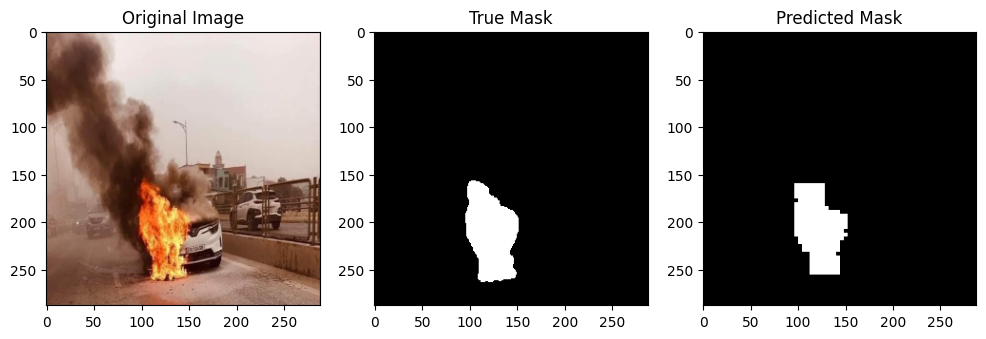

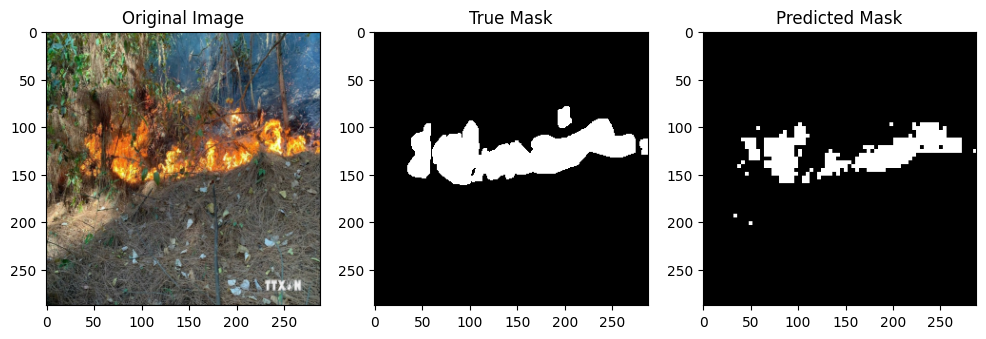

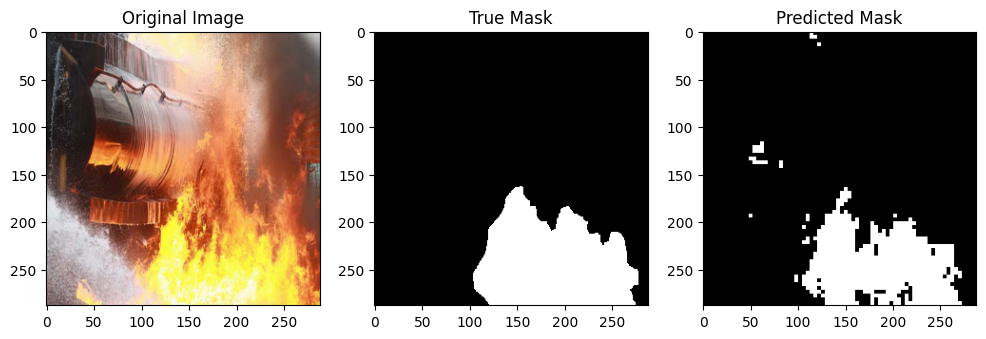

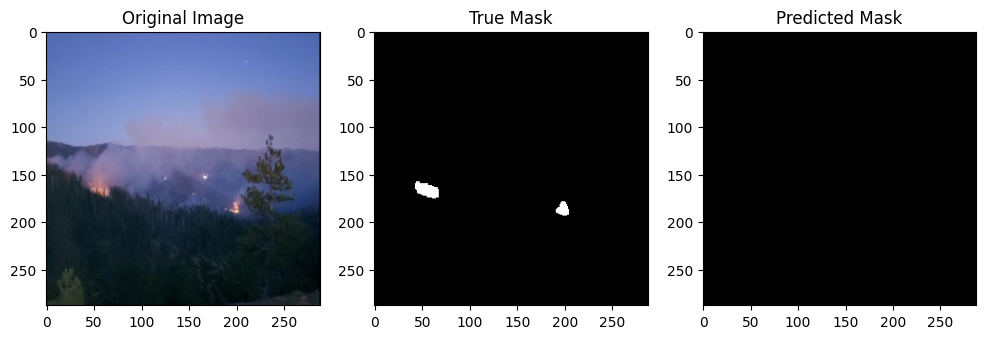

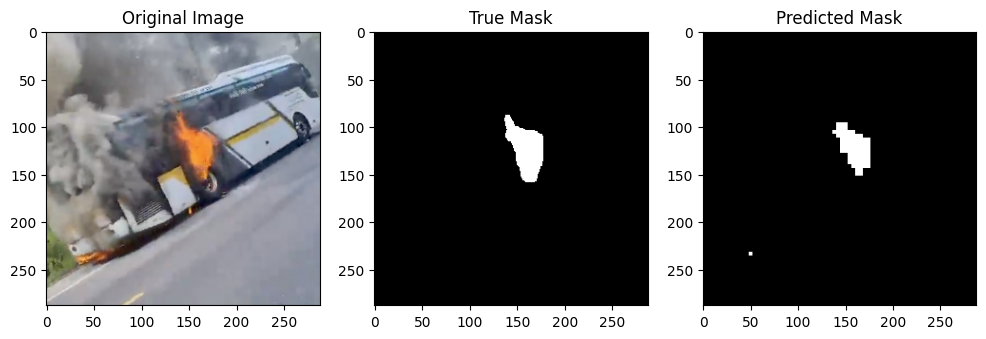

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị một số ảnh và mask
num_images = 5  # Số lượng ảnh muốn hiển thị
for i in range(num_images):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(X_test[i])

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(Y_test[i].squeeze(), cmap='gray')  # Squeeze để loại bỏ chiều không cần thiết

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(Y_pred[i].squeeze(), cmap='gray')

    plt.show()


NameError: name 'X_test_subset' is not defined

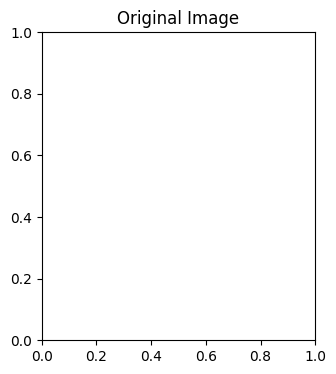

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị một số ảnh và mask
num_images = 20  # Số lượng ảnh muốn hiển thị
for i in range(num_images):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(X_test_subset[i])

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(Y_test_subset[i].squeeze(), cmap='gray')  # Squeeze để loại bỏ chiều không cần thiết

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(Y_pred_subset[i].squeeze(), cmap='gray')

    plt.show()
